In [2]:
import re
import time
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time
from progressbar import ProgressBar
from tqdm import tqdm
from random import randint

In [3]:
FutBin=requests.get("https://www.futbin.com/20/players?page=7")
bs=BeautifulSoup(FutBin.text)


In [3]:
#bs(href=re.compile("20/player/"))
links=[]
for i in bs(href=re.compile("20/player/")):
    piece=i['href']
    link='https://www.futbin.com'+piece
    links.append(link)
Links=pd.Series(links)

In [6]:
original_dataframe=pd.read_html(FutBin.text)

In [8]:
original_dataframe[0]

,Name,RAT,POS,VER,PS,SKI,WF,WR,PAC,SHO,PAS,DRI,DEF,PHY,Unnamed: 14,Unnamed: 15,BS,IGS
0,Alessandro Nesta,92,CB,Icon,264K,2,3,M \ H,72,42,65,67,94,86,"187cm | 6'2"" High & Average (79kg)",133,426,1939
1,Peter Schmeichel,92,GK,Icon,120K,1,3,M \ M,92,87,88,94,49,90,"193cm | 6'4"" High & Stocky (92kg)",42,500,1300
2,Hristo Stoichkov,92,ST,Icon,545K,4,3,M \ M,92,93,86,92,50,86,"178cm | 5'10"" Average (73kg)",694,499,2407
3,Neymar Jr,92,LW,Normal,310K,5,5,H \ M,91,85,87,95,32,58,"175cm | 5'9"" Neymar (68kg)",11570,448,2197
4,Rivaldo,92,LW,Icon,259K,4,2,M \ L,87,91,88,92,44,78,"186cm | 6'1"" High & Average+ (75kg)",163,480,2335
5,Raúl González Blanco,92,CF,Icon,470K,4,4,H \ M,88,92,82,90,47,75,"180cm | 5'11"" Lean (68kg)",869,474,2297
6,Kenny Dalglish,92,ST,Icon,1.77M,4,5,H \ M,90,92,77,90,41,73,"173cm | 5'8"" Average (73kg)",1130,463,2271
7,Hugo Sánchez,92,ST,Icon,400K,3,4,H \ M,92,93,81,90,44,75,"176cm | 5'9"" Average (73kg)",524,475,2288
8,Garrincha,92,RW,Icon,680K,5,4,M \ L,90,86,92,94,41,67,"169cm | 5'7"" Short & Lean- (71kg)",510,470,2275
9,Andrea Pirlo,92,CM,Icon,242K,5,4,M \ M,73,80,95,91,71,67,"177cm | 5'10"" Lean (67kg)",416,477,2347


In [34]:
randint(5,10)

7

In [ ]:
col_names_to_change={"Unnamed: 14": 'BodyProfile',"Unnamed: 15":"Popularity","BS":"BaseStats","IGS":"InGameStats"}
original_dataframe.rename(columns=col_names_to_change,inplace=True)

In [2]:
def price_conversion(x):
    r = float(0)
    x = x.strip()
    if 'M' in x:
        r = float(x[:-1]) * 1000000
    elif 'K' in x:
        r = float(x[:-1]) * 1000
    elif '0' == x:
        r = float(x)
    return int(r)


In [8]:
df=original_dataframe
df['Price']=df.PS.map(price_conversion)


NameError: name 'original_dataframe' is not defined

In [ ]:
df.BodyProfile.str.split('|',expand=True)
df['Height']=df.BodyProfile.str.split('|',expand=True)[0].str.replace('cm','').astype(int)
df['Weight']=df.BodyProfile.str.split('(',expand=True)[1].str.replace('kg\)','').astype(int)
df['BodyType']=df.BodyProfile.str.split('(',expand=True)[0].str.split('"',expand=True)[1].str.strip()
df['PriceK']=df.Price/1000

In [2]:
def price_conversion(x):
    r = float(0)
    x = x.strip()
    if 'M' in x:
        r = float(x[:-1]) * 1000000
    elif 'K' in x:
        r = float(x[:-1]) * 1000
    elif '0' == x:
        r = float(x)
    return int(r)


In [3]:
def get_sub_stats_for_player(url):
    PlayerFutBin=requests.get(url)
    soup=BeautifulSoup(PlayerFutBin.text)
    
    #Get additional Info about a players that we didn't parse in the main 
    add_info=pd.read_html(PlayerFutBin.text)[0].set_index(0)
    add_info=add_info.loc[['Club','Nation','League','Foot']].T.reset_index().drop('index',axis=1)
   
    list_of_values=[]
    for i in soup(lambda tag: tag.name == 'div' and tag.get('class') == ['stat_val']):
        value=i.get_text()
        list_of_values.append(value)
    list_of_attributes=[]
    for i in soup('span',attrs={'class':'ig-stat-name-tooltip'}):
        attribute=i.get_text()
        list_of_attributes.append(attribute)
    mapped=dict(zip(list_of_attributes, list_of_values)) 
    mapped=pd.Series(mapped).to_frame().T
    
    for i in mapped.columns:
        mapped[i]=mapped[i].astype(int)
    
    output=pd.concat([mapped,add_info],axis=1)
    output['url']=url
    return output

In [5]:
get_sub_stats_for_player('https://www.futbin.com/20/player/43781/eden-hazard')

,Pace,Acceleration,Sprint Speed,Shooting,Positioning,Finishing,Shot Power,Long Shots,Volleys,Penalties,...,Physicality,Jumping,Stamina,Strength,Aggression,Club,Nation,League,Foot,url
0,92,95,88,85,89,86,83,81,85,90,...,67,56,85,63,54,Real Madrid,Belgium,LaLiga Santander,Right,https://www.futbin.com/20/player/43781/eden-ha...


In [5]:
def extract_data_from_page(page_number):
    FutBin = requests.get("https://www.futbin.com/20/players?page=" + str(page_number))
    bs = BeautifulSoup(FutBin.text, 'html.parser')
    links=[]
    ### LOOP TO GET LINKS
    for i in bs(href=re.compile("20/player/")):
        piece=i['href']
        link='https://www.futbin.com'+piece
        links.append(link)
    Links=pd.Series(links)
    original_dataframe=pd.read_html(FutBin.text)[0]
    
    ### RENAMING COLUMNS
    col_names_to_change={"Unnamed: 14": 'BodyProfile',"Unnamed: 15":"Popularity","BS":"BaseStats","IGS":"InGameStats"}
    original_dataframe.rename(columns=col_names_to_change,inplace=True)
    df=original_dataframe
    
    ### CLEANING UP VALUES
    df['InGameStats']=df['InGameStats'].astype(str).str.replace('-','0').astype(int)
    ## EXTRACTING VARIABLE FROM BODY PROFILE
    df['Height']=df.BodyProfile.str.split('|',expand=True)[0].str.replace('cm','').astype(int)
    df['Weight']=df.BodyProfile.str.split('(',expand=True)[1].str.replace('kg\)','').astype(int)
    df['BodyType']=df.BodyProfile.str.split('(',expand=True)[0].str.split('"',expand=True)[1].str.strip()
    
    ## ADJUSTING PRICE
    df['Price']=df.PS.map(price_conversion)
    df['PriceK']=df.Price/1000
    
    ## adding the LINK
    df['Links']=Links
    
    
    ### NEW ADDITION
    LinksPlayers=df.Links[df.POS!='GK']
    df_to_merge=pd.DataFrame()
    
    for i in LinksPlayers:
        add_stats=get_sub_stats_for_player(i)
        df_to_merge=df_to_merge.append(add_stats)
        time.sleep(randint(3,5))
    
    df=df.merge(df_to_merge,how='left',left_on='Links',right_on='url')
    df=df.drop('Links',axis=1)
    return df
    

In [152]:
testing=extract_data_from_page(5)

In [157]:
testing.columns


Index(['Name', 'RAT', 'POS', 'VER', 'PS', 'SKI', 'WF', 'WR', 'PAC', 'SHO',
       'PAS', 'DRI', 'DEF', 'PHY', 'BodyProfile', 'Popularity', 'BaseStats',
       'InGameStats', 'Height', 'Weight', 'BodyType', 'Price', 'PriceK',
       'Pace', 'Acceleration', 'Sprint Speed', 'Shooting', 'Positioning',
       'Finishing', 'Shot Power', 'Long Shots', 'Volleys', 'Penalties',
       'Passing', 'Vision', 'Crossing', 'FK. Accuracy', 'Short Passing',
       'Long Passing', 'Curve', 'Dribbling', 'Agility', 'Balance', 'Reactions',
       'Ball Control', 'Composure', 'Defending', 'Interceptions',
       'Heading Accuracy', 'Def. Awareness', 'Standing Tackle',
       'Sliding Tackle', 'Physicality', 'Jumping', 'Stamina', 'Strength',
       'Aggression', 'Club', 'Nation', 'League', 'Foot', 'url'],
      dtype='object')

In [6]:
def extract_futbin_data(number_of_pages):
    df=pd.DataFrame(columns=['Name', 'RAT', 'POS', 'VER', 'PS', 'SKI', 'WF', 'WR', 'PAC', 'SHO',
       'PAS', 'DRI', 'DEF', 'PHY', 'BodyProfile', 'Popularity', 'BaseStats',
       'InGameStats', 'Height', 'Weight', 'BodyType', 'Price', 'PriceK',
       'Pace', 'Acceleration', 'Sprint Speed', 'Shooting', 'Positioning',
       'Finishing', 'Shot Power', 'Long Shots', 'Volleys', 'Penalties',
       'Passing', 'Vision', 'Crossing', 'FK. Accuracy', 'Short Passing',
       'Long Passing', 'Curve', 'Dribbling', 'Agility', 'Balance', 'Reactions',
       'Ball Control', 'Composure', 'Defending', 'Interceptions',
       'Heading Accuracy', 'Def. Awareness', 'Standing Tackle',
       'Sliding Tackle', 'Physicality', 'Jumping', 'Stamina', 'Strength',
       'Aggression', 'Club', 'Nation', 'League', 'Foot', 'url'])
    for i in tqdm(range(1,number_of_pages,1)):
        page_extraction=extract_data_from_page(i)
        df=df.append(page_extraction)
        time.sleep(randint(3,5))
    df=df.reset_index().rename(columns={'index':'position_on_page'})
    
    to_convert=['RAT', 'SKI', 'WF', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 
       'BaseStats', 'InGameStats', 'Height', 'Weight',
        'Price', 'PriceK', 'Pace', 'Acceleration', 'Sprint Speed',
       'Shooting', 'Positioning', 'Finishing', 'Shot Power', 'Long Shots',
       'Volleys', 'Penalties', 'Passing', 'Vision', 'Crossing', 'FK. Accuracy',
       'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility',
       'Balance', 'Reactions', 'Ball Control', 'Composure', 'Defending',
       'Interceptions', 'Heading Accuracy', 'Def. Awareness',
       'Standing Tackle', 'Sliding Tackle', 'Physicality', 'Jumping',
       'Stamina', 'Strength', 'Aggression']

    for i in to_convert:
        df[i]=df[i].fillna(0).astype(int)
        df[i]=df[i].astype(int)
    return df

In [7]:
output=extract_futbin_data(100)
output.to_csv('FUTstats05052020.csv',index=False)

 24%|██▍       | 24/99 [52:49<2:45:05, 132.07s/it]


ImportError: html5lib not found, please install it

In [47]:
len(output)

2970

In [41]:
to_convert=['RAT', 'SKI', 'WF', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 
       'BaseStats', 'InGameStats', 'Height', 'Weight',
        'Price', 'PriceK', 'Pace', 'Acceleration', 'Sprint Speed',
       'Shooting', 'Positioning', 'Finishing', 'Shot Power', 'Long Shots',
       'Volleys', 'Penalties', 'Passing', 'Vision', 'Crossing', 'FK. Accuracy',
       'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility',
       'Balance', 'Reactions', 'Ball Control', 'Composure', 'Defending',
       'Interceptions', 'Heading Accuracy', 'Def. Awareness',
       'Standing Tackle', 'Sliding Tackle', 'Physicality', 'Jumping',
       'Stamina', 'Strength', 'Aggression']

for i in to_convert:

    output[i]=output[i].fillna(0).astype(int)
    output[i]=output[i].astype(int)

output.dtypes

position_on_page     int64
Name                object
RAT                  int64
POS                 object
VER                 object
                     ...  
Club                object
Nation              object
League              object
Foot                object
url                 object
Length: 63, dtype: object

In [18]:
for i in to_convert:
    print(output[i].unique())

[99 98 97 96 95 94 93]
[4 2 5 1 3]
[4 3 5 2]
['M \\ L' 'M \\ M' 'H \\ L' 'H \\ M' 'H \\ H' 'M \\ H']
[96 88 97 95 99 92 91 98 87 85 90 93 89 94 82 86 81 73 74 76 83 70 79 80
 84 71 75]
[98 80 99 96 93 95 92 88 97 94 75 91 85 90 60 56 89 87 44 64 46 86 50 70
 49 84 66 62 65 43 83 40 53]
[99 92 94 95 93 82 97 81 96 86 87 90 77 76 85 75 80 91 84 83 65 89 70 78
 88 68 79]
[99 90 98 96 97 95 88 93 92 70 91 69 94 84 86 61 75 89 82 72 87 80 83 85
 74 81]
[50 99 45 42 62 60 55 82 40 57 70 97 46 76 43 44 75 41 96 48 56 92 39 35
 38 54 66 37 72 36 65 88 98 93 83 59 34 90 58 95 53 63 33 51 47 78 52 94]
[85 98 95 80 81 76 90 93 88 82 71 72 86 70 69 96 77 75 68 67 87 62 83 99
 73 84 66 79 89 94 91 60 78 61 59 92]
[527 547 526 508 532 516 531 554 490 528 546 559 503 540 495 497 489 529
 486 500 505 481 480 478 545 485 472 501 509 479 513 465 510 483 512 476
 475 473 535 541 469 538 452 506 442 543 484 468 477 504 458 498 464 487
 456 525 491 444 467 455 454 519 496 514 482 522 530 488 441 502]
[2519

In [174]:
output[(output.SHO>85)&(output.Price)>0].sort_values('Price',ascending=True).head(25)

,position_on_page,Name,RAT,POS,VER,PS,SKI,WF,WR,PAC,...,Physicality,Jumping,Stamina,Strength,Aggression,Club,Nation,League,Foot,url
1327,7,Zlatan Ibrahimovic,85,ST,Normal,7.3K,5,4,M \ L,56,...,78.0,68.0,59.0,87.0,84.0,Milan,Sweden,Serie A TIM,Right,https://www.futbin.com/20/player/44200/zlatan-...
1196,26,James Rodríguez,85,CAM,Normal,8K,4,2,M \ M,55,...,63.0,46.0,65.0,64.0,60.0,Real Madrid,Colombia,LaLiga Santander,Left,https://www.futbin.com/20/player/423/james-rod...
1218,18,Zlatan Ibrahimovic,85,ST,Normal,8K,5,4,M \ L,56,...,78.0,68.0,59.0,87.0,84.0,LA Galaxy,Sweden,Major League Soccer,Right,https://www.futbin.com/20/player/4071/zlatan-i...
1268,8,James Rodríguez,85,CAM,CL,8.3K,4,2,M \ M,55,...,63.0,46.0,65.0,64.0,60.0,Real Madrid,Colombia,LaLiga Santander,Left,https://www.futbin.com/20/player/43070/james-r...
1233,3,Péter Gulácsi,85,GK,Normal,8.4K,1,2,M \ M,84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1261,1,Péter Gulácsi,85,GK,CL,8.7K,1,2,M \ M,84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1229,29,Gareth Bale,85,RW,Normal,13.5K,4,3,M \ M,91,...,76.0,86.0,73.0,80.0,65.0,Real Madrid,Wales,LaLiga Santander,Left,https://www.futbin.com/20/player/19718/gareth-...
1365,15,Max Kruse,85,ST,TOTW Moments,18K,4,4,H \ M,71,...,73.0,67.0,76.0,76.0,64.0,Fenerbahçe SK,Germany,Süper Lig,Left,https://www.futbin.com/20/player/48105/max-kruse
1130,20,Péter Gulácsi,86,GK,CL MOTM,18.75K,1,2,M \ M,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061,11,Erling Håland,86,ST,CL TOTT,20.75K,3,3,H \ M,88,...,86.0,75.0,78.0,90.0,87.0,FC Red Bull Salzburg,Norway,Österreichische Fußball-Bundesliga,Left,https://www.futbin.com/20/player/43869/erling-...


In [48]:
output.to_csv('FUTstats042820.csv',index=False)

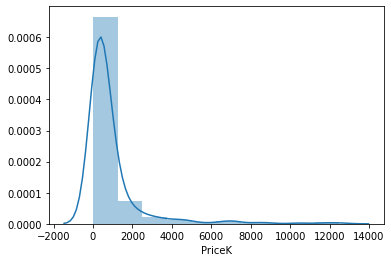

In [49]:
import seaborn as sns
sns.distplot(output[output.VER=='Icon'].PriceK,bins=10)

In [94]:
output[(output.VER=='TOTS')].describe()

,position_on_page,RAT,SKI,WF,PAC,SHO,PAS,DRI,DEF,PHY,Popularity,BaseStats,Height,Weight,Price,PriceK
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,3.400000e+01,34.000000
mean,10.176471,89.294118,2.941176,3.176471,86.235294,77.411765,83.676471,87.676471,71.235294,85.117647,184.500000,491.352941,182.764706,76.205882,2.349044e+05,234.904412
std,9.369423,2.736171,1.126571,0.626224,8.235396,14.306425,6.197363,5.891548,19.753111,6.567896,183.724308,17.606614,7.588104,7.168024,3.442856e+05,344.285558
min,0.000000,85.000000,1.000000,2.000000,65.000000,40.000000,67.000000,71.000000,35.000000,70.000000,-179.000000,451.000000,168.000000,64.000000,1.500000e+04,15.000000
25%,2.250000,87.250000,2.000000,3.000000,82.000000,71.500000,80.250000,85.250000,54.000000,82.000000,50.250000,481.500000,178.250000,70.500000,3.343750e+04,33.437500
50%,6.500000,89.000000,3.000000,3.000000,88.000000,82.000000,84.500000,88.000000,79.500000,86.000000,170.500000,490.000000,182.500000,76.000000,9.900000e+04,99.000000
75%,15.750000,92.000000,4.000000,3.000000,92.750000,88.000000,87.750000,92.000000,88.750000,90.000000,231.000000,502.000000,187.750000,81.750000,2.917500e+05,291.750000
max,29.000000,93.000000,5.000000,5.000000,98.000000,95.000000,94.000000,97.000000,95.000000,96.000000,785.000000,544.000000,199.000000,96.000000,1.410000e+06,1410.000000


In [95]:
output.dtypes

position_on_page      int64
Name                 object
RAT                   int64
POS                  object
VER                  object
PS                   object
SKI                   int64
WF                    int64
WR                   object
PAC                   int64
SHO                   int64
PAS                   int64
DRI                   int64
DEF                   int64
PHY                   int64
BodyProfile          object
Popularity            int64
BaseStats             int64
InGameStats          object
Height                int64
Weight                int64
BodyType             object
Price                 int64
PriceK              float64
Links                object
dtype: object

In [ ]:
PlayerFutBin=requests.get("https://www.futbin.com/20/player/45500/marco-van-basten")
pd.read_html(PlayerFutBin)

In [105]:
output2.dtypes


position_on_page      int64
Name                 object
RAT                  object
POS                  object
VER                  object
PS                   object
SKI                  object
WF                   object
WR                   object
PAC                  object
SHO                  object
PAS                  object
DRI                  object
DEF                  object
PHY                  object
BodyProfile          object
Popularity           object
BaseStats            object
InGameStats          object
Height               object
Weight               object
BodyType             object
Price                object
PriceK              float64
Links                object
dtype: object

In [111]:
def get_sub_stats_for_player(url):
    PlayerFutBin=requests.get(url)
    soup=BeautifulSoup(PlayerFutBin.text)
    #Get additional Info
    add_info=pd.read_html(PlayerFutBin.text)[0].set_index(0)
    add_info=add_info.loc[['Club','Nation','League','Foot']].T.reset_index().drop('index',axis=1)
   
    list_of_values=[]
    for i in soup(lambda tag: tag.name == 'div' and tag.get('class') == ['stat_val']):
        value=i.get_text()
        list_of_values.append(value)
    list_of_attributes=[]
    for i in soup('span',attrs={'class':'ig-stat-name-tooltip'}):
        attribute=i.get_text()
        list_of_attributes.append(attribute)
    mapped=dict(zip(list_of_attributes, list_of_values)) 
    mapped=pd.Series(mapped).to_frame().T
    for i in mapped.columns:
        mapped[i]=mapped[i].astype(int)
    
    output=pd.concat([mapped,add_info],axis=1)
    return output

In [112]:
sub=get_sub_stats_for_player('https://www.futbin.com/20/player/45500/marco-van-basten')

In [113]:
sub.dtypes

Pace                 int64
Acceleration         int64
Sprint Speed         int64
Shooting             int64
Positioning          int64
Finishing            int64
Shot Power           int64
Long Shots           int64
Volleys              int64
Penalties            int64
Passing              int64
Vision               int64
Crossing             int64
FK. Accuracy         int64
Short Passing        int64
Long Passing         int64
Curve                int64
Dribbling            int64
Agility              int64
Balance              int64
Reactions            int64
Ball Control         int64
Composure            int64
Defending            int64
Interceptions        int64
Heading Accuracy     int64
Def. Awareness       int64
Standing Tackle      int64
Sliding Tackle       int64
Physicality          int64
Jumping              int64
Stamina              int64
Strength             int64
Aggression           int64
Club                object
Nation              object
League              object
F